# **Outline**



*   Load libraries and dataset


*   Data Exploration - EDA
*   Data Pre-Processing

*   PCA
*   K-means Clustering





## Import necessary libraries

In [ ]:
!pip install iplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import iplot
from plotly.offline import iplot
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# EDA

In [ ]:
df=pd.read_csv('/content/NBA_player_of_the_week.csv')

First look at our dataset

In [ ]:
df.head()

,Active season,Player,Team,Conference,Date,Position,Height,Weight,Age,Draft Year,Seasons in league,Season,Season short,Real_value
0,0,Micheal Ray Richardson,New Jersey Nets,NaN,"Apr 14, 1985",PG,6-5,189,29,1978,6,1984-1985,1985,1.0
1,0,Derek Smith,Los Angeles Clippers,NaN,"Apr 7, 1985",SG,6-6,205,23,1982,2,1984-1985,1985,1.0
2,0,Calvin Natt,Denver Nuggets,NaN,"Apr 1, 1985",F,6-6,220,28,1979,5,1984-1985,1985,1.0
3,0,Kareem Abdul-Jabbar,Los Angeles Lakers,NaN,"Mar 24, 1985",C,7-2,225,37,1969,15,1984-1985,1985,1.0
4,0,Larry Bird,Boston Celtics,NaN,"Mar 17, 1985",SF,6-9,220,28,1978,5,1984-1985,1985,1.0


In [ ]:
df.describe()

,Active season,Weight,Age,Draft Year,Seasons in league,Season short,Real_value
count,1155.000000,1155.000000,1155.000000,1155.000000,1155.000000,1155.000000,1155.000000
mean,0.008658,226.038095,26.772294,1997.372294,5.870130,2004.339394,0.666234
std,0.092685,31.590100,3.393478,9.442516,3.265082,9.485598,0.235651
min,0.000000,150.000000,19.000000,1969.000000,0.000000,1985.000000,0.500000
25%,0.000000,205.000000,24.000000,1991.000000,3.000000,1997.000000,0.500000
50%,0.000000,225.000000,26.000000,1998.000000,6.000000,2006.000000,0.500000
75%,0.000000,250.000000,29.000000,2004.000000,8.000000,2012.000000,1.000000
max,1.000000,325.000000,40.000000,2016.000000,17.000000,2019.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Active season      1155 non-null   int64  
 1   Player             1155 non-null   object 
 2   Team               1155 non-null   object 
 3   Conference         771 non-null    object 
 4   Date               1155 non-null   object 
 5   Position           1155 non-null   object 
 6   Height             1155 non-null   object 
 7   Weight             1155 non-null   int64  
 8   Age                1155 non-null   int64  
 9   Draft Year         1155 non-null   int64  
 10  Seasons in league  1155 non-null   int64  
 11  Season             1155 non-null   object 
 12  Season short       1155 non-null   int64  
 13  Real_value         1155 non-null   float64
dtypes: float64(1), int64(6), object(7)
memory usage: 126.5+ KB


In [ ]:
df[['Height','Weight']]

,Height,Weight
0,6-5,189
1,6-6,205
2,6-6,220
3,7-2,225
4,6-9,220
...,...,...
1150,6-3,200
1151,6-11,242
1152,6-3,190
1153,6-1,184


In [ ]:
def conv_weight(w):
    try:
        return int(w)
    except:
        pass
    finally:
        if len(w.split('k'))==2:
            k = int(w.split('k')[0]) * 2.23
            return k

In [ ]:
df['Weight']=df['Weight'].apply(conv_weight)
df['Weight']

In [ ]:
'''
Cleaning the height column
'''
def conv_height(h):
    try:
        f =(int(h.split('-')[0])*30.48) + (int(h.split('-')[1])*2.54)
        return f
    except:
        pass
    finally:
        if len(h.split('c'))==2:
            m = int(h.split('c')[0])
            return m

In [ ]:
df['Height']=df['Height'].apply(conv_height)
df['Height']

0       195.58
1       198.12
2       198.12
3       218.44
4       205.74
         ...  
1150    190.50
1151    210.82
1152    190.50
1153    185.42
1154    213.36
Name: Height, Length: 1155, dtype: float64

In [ ]:
#check for colomns if they have any null values
df.isnull()

,Active season,Player,Team,Conference,Date,Position,Height,Weight,Age,Draft Year,Seasons in league,Season,Season short,Real_value
0,False,False,False,True,False,False,False,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1150,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1151,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1152,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1153,False,False,False,False,False,False,False,False,False,False,False,False,False,False


As we can see that there are null values in the Conference colomn, so we will deal with it first and then move on to further analysis.

In [ ]:
'''
Providing NBA Team to Missing data on Conference
'''

NBA_team=[]

for team in df['Team']:
    NBA_team.append(team)

NBA_team=set(NBA_team)

east_teams=['Atlanta Hawks', 'Boston Celtics', 'Brooklyn Nets', 'Charlotte Bobcats', 'Charlotte Hornets',
 'Chicago Bulls', 'Cleveland Cavaliers','Detroit Pistons','Indiana Pacers', 'Miami Heat', 'Milwaukee Bucks','New Jersey Nets',
 'New York Knicks', 'Orlando Magic','Philadelphia Sixers','Seattle SuperSonics', 'Toronto Raptors']

west_teams=['Dallas Mavericks', 'Denver Nuggets','Golden State Warriors',
 'Houston Rockets','Los Angeles Clippers', 'Los Angeles Lakers', 'Memphis Grizzlies','Minnesota Timberwolves','New Orleans Hornets',
 'New Orleans Pelicans','Oklahoma City Thunder','Phoenix Suns','Portland Trail Blazers', 'Sacramento Kings',
  'San Antonio Spurs','Utah Jazz', 'Washington Bullets', 'Washington Wizards']

In [ ]:
#This function tells us about wether the team's on west side or east side
def in_we(t):
    for h in t:
        for i in east_teams:
            if i == t:
                return('East')
            for j in west_teams:
                if j== t:
                    return ('West')

In [ ]:
df['Conference']=df['Team'].apply(in_we)
df['Conference']

0       East
1       West
2       West
3       West
4       East
        ... 
1150    West
1151    East
1152    West
1153    East
1154    West
Name: Conference, Length: 1155, dtype: object

In [ ]:
# bubble plot of age of player of the week by time. Size of the bubble represents weight of the player
bubble_data = [
    {
        'y': df.Age,
        'x': df.Date,
        'mode': 'markers',
        'marker': {
            'color': df['Season short'],
            'size': df.Weight/10,
            'showscale': True
        },
        "text" :  df.Player
    }
]

iplot(bubble_data)

As we can see that Michael Jordan is the oldest in the dataset.

In [ ]:
#Age v/s Weight chart of players over the years!

bubble_data = [
    {
        'y': df.Age,
        'x': df.Weight,
        'mode': 'markers',
        'marker': {
            'color': df['Season short'],
            'size': df.Weight/10,
            'showscale': True
        },
        "text" :  df.Player
    }
]

iplot(bubble_data)

As we can see that Shaquille O'Nea have had the highest weight overall.

In [ ]:
#Age v/s Seasons in league chart of players over the years!
#X-axis represents the Age while Y-axis represents the Seasons in league.

bubble_data = [
    {
        'y': df.Age,
        'x': df['Seasons in league'],
        'mode': 'markers',
        'marker': {
            'color': df['Season short'],
            'size': df.Weight/10,
            'showscale': True
        },
        "text" :  df.Player
    }
]

iplot(bubble_data)

Michael jordan have the most Seasons in league.

Text(0.5, 1.0, 'Top ten players!')

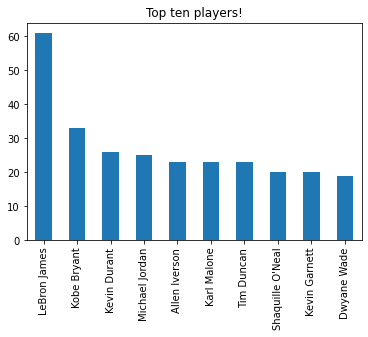

In [ ]:
#Visualizing the top ten players

df['Player'].value_counts().head(10).plot(kind='bar')
plt.title("Top ten players!")

### Correlation betweeen different attributes with visualizations

In [ ]:
NUMERICAL_FEATURES = [ 'Age',
'Conference',
'Date',
'Draft Year' ,
'Height' ,
'Player' ,
'Position' ,
'Season',
'Season short' ,
'Seasons in league',
'Team' ,
'Weight',
'Real_value',

]

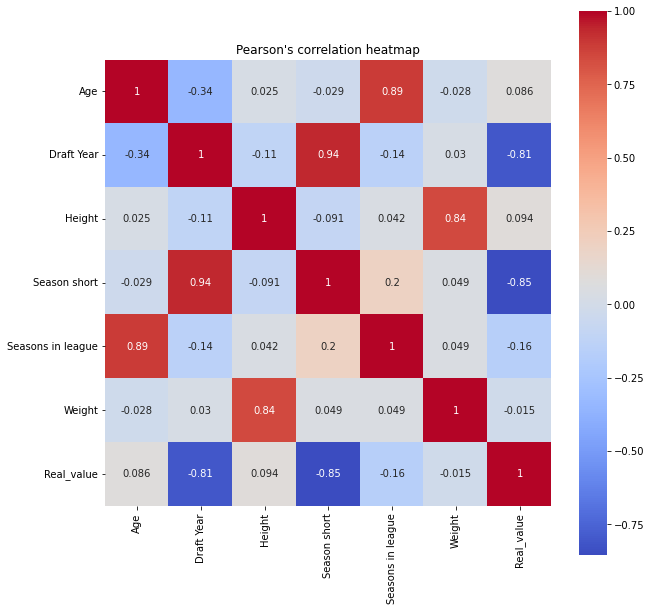

In [ ]:
corr_matr = df[NUMERICAL_FEATURES].corr(method='pearson')
plt.figure(figsize=(10,10))
sns.heatmap(corr_matr, annot=True, cmap='coolwarm', square=True)
plt.title("Pearson's correlation heatmap")
plt.show()

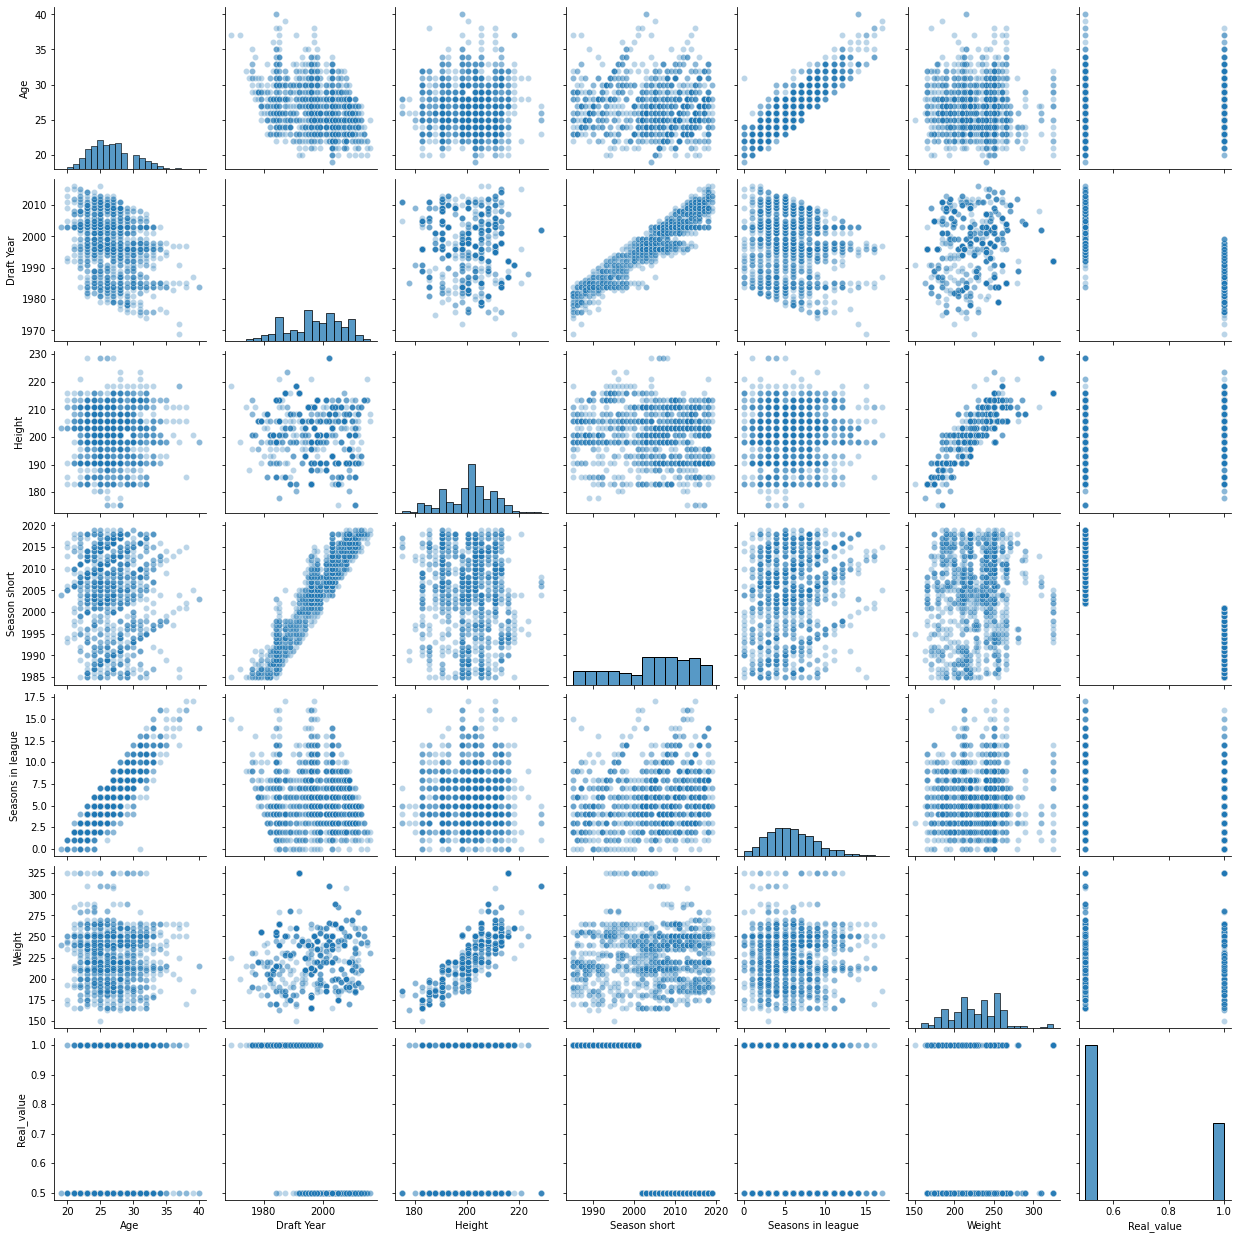

In [ ]:
sns.pairplot(data=df[NUMERICAL_FEATURES],
             kind='scatter', plot_kws={'alpha':0.3})
plt.show()

## PCA

In [ ]:
#Converting the dataframe attributes to array values so that to use for feature scaling and pca
xx = df.iloc[:, [0, 12]].values

In [ ]:
# Feature Scaling! Transforming the features.
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_t = sc.fit_transform(xx)

In [ ]:
# Applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_tr = pca.fit_transform(xx)
explained_variance = pca.explained_variance_ratio_

In [ ]:
X_tr.shape

(1155, 2)

In [ ]:
#PCA variance ratio output
pca.explained_variance_ratio_

array([9.99906528e-01, 9.34720052e-05])

In [ ]:
#PCA variance ratio Sum output
pca.explained_variance_ratio_.sum()

1.0

Text(0, 0.5, 'PCA_2')

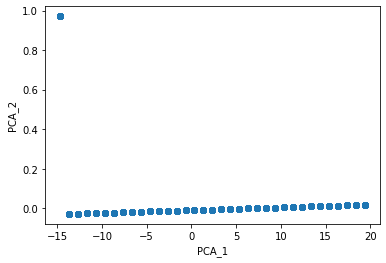

In [ ]:
plt.scatter(X_tr[:,0], X_tr[:,1])
plt.xlabel('PCA_1')
plt.ylabel('PCA_2')

This explains that we have a very good variance ratio because of correlated attributes.

## K-means

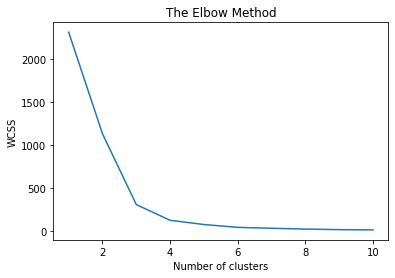

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_t)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

5 is the point where it really deviates so we will take 5 as the number of clusters to use for k-means. It seems to be our optimal number of clusters.

In [ ]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X_t)

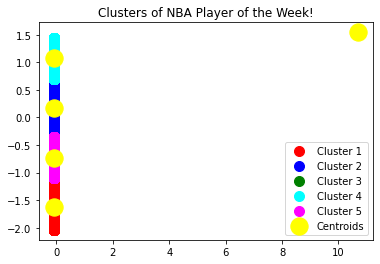

In [ ]:
# Visualising the clusters
plt.scatter(X_t[y_kmeans == 0, 0], X_t[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X_t[y_kmeans == 1, 0], X_t[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X_t[y_kmeans == 2, 0], X_t[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X_t[y_kmeans == 3, 0], X_t[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X_t[y_kmeans == 4, 0], X_t[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of NBA Player of the Week!')
plt.legend()
plt.show()

There are five clusters and the Yellow dots represents the cluster centroids.
All the dataset that we had, with the help of PCA and elbow method we determined the number of clusters needed to apply for k-means and then using those number of clusters we plotted the k-means clustering on this dataset. And this result shows us the different clusters with their centeroids.